In [1]:
from __future__ import division
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
from wrangle import clean_log_data
%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
df= clean_log_data()

In [3]:
df.index.dtype

dtype('<M8[ns]')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     900223 non-null  object
 1   time     900223 non-null  object
 2   path     900222 non-null  object
 3   user_id  900223 non-null  object
 4   ip       900223 non-null  object
 5   cohort   847330 non-null  object
 6   year     900223 non-null  object
 7   month    900223 non-null  object
 8   day      900223 non-null  object
 9   hour     900223 non-null  object
 10  weekday  900223 non-null  object
dtypes: object(11)
memory usage: 82.4+ MB


In [5]:
df.describe()

,date,time,path,user_id,ip,cohort,year,month,day,hour,weekday
count,900223,900223,900222,900223,900223,847330,900223,900223,900223,900223,900223
unique,1182,73167,2313,981,5531,47,4,12,31,24,7
top,2021-03-19,09:03:00,/,11,97.105.19.58,Staff,2020,3,19,9,Monday
freq,3104,81,50313,17913,284579,84031,350763,110361,34925,131831,185188


In [6]:
df.cohort.isna().sum()

52893

In [7]:
#df.groupby(['ip']).count()

In [8]:
df.groupby('weekday').count()

,date,time,path,user_id,ip,cohort,year,month,day,hour
weekday,,,,,,,,,,
Friday,135148,135148,135148,135148,135148,127384,135148,135148,135148,135148
Monday,185188,185188,185188,185188,185188,174418,185188,185188,185188,185188
Saturday,34319,34319,34319,34319,34319,32020,34319,34319,34319,34319
Sunday,48272,48272,48272,48272,48272,45221,48272,48272,48272,48272
Thursday,163472,163472,163472,163472,163472,153249,163472,163472,163472,163472
Tuesday,179515,179515,179515,179515,179515,169530,179515,179515,179515,179515
Wednesday,154309,154309,154308,154309,154309,145508,154309,154309,154309,154309


In [9]:
df.groupby('weekday')['ip'].count()

weekday
Friday       135148
Monday       185188
Saturday      34319
Sunday        48272
Thursday     163472
Tuesday      179515
Wednesday    154309
Name: ip, dtype: int64

In [10]:
df.groupby(["weekday", "hour"])["ip"].count()

weekday    hour
Friday     0        1078
           1         519
           2         213
           3         115
           4         176
           5         270
           6         892
           7        1713
           8        8367
           9       22585
           10      14347
           11      14800
           12       8385
           13      12079
           14      14132
           15      13659
           16      10662
           17       2361
           18       1672
           19       1482
           20       1528
           21       1535
           22       1529
           23       1049
Monday     0        1101
           1         565
           2         264
           3         101
           4         131
           5         339
           6         666
           7        2374
           8       11047
           9       29565
           10      18445
           11      19813
           12      10701
           13      15406
           14      18273
         

In [11]:
df.groupby('weekday')["user_id"].sum()

weekday
Friday       61841459
Monday       85606613
Saturday     16572924
Sunday       23309351
Thursday     76374495
Tuesday      82047569
Wednesday    67293043
Name: user_id, dtype: int64

In [12]:
df.groupby('weekday')["ip"].sum()

weekday
Friday       97.105.19.6197.105.19.6197.105.19.6197.105.19....
Monday       24.160.159.12224.160.159.12224.160.159.12224.1...
Saturday     108.65.244.91108.65.244.91108.65.244.91174.207...
Sunday       96.8.179.5996.8.179.5996.8.179.5970.114.139.15...
Thursday     66.69.62.21966.69.62.21966.69.62.21966.69.62.2...
Tuesday      108.65.244.91108.65.244.91108.65.244.9197.105....
Wednesday    23.122.42.15123.122.42.15123.122.42.15172.181....
Name: ip, dtype: object

Takeways:
- There are 900223 hits to the Codeup Curriculum 
- The data consists of a datetime object, the page that was being viewed, the user id, cohort id, and ip address.
- Students are assigned numbers (user_id) and grouped in to cohorts (cohort_id)
- There are 52893 nulls for cohort_id which could suggest instructor use of the website.
- Students often hit the website from different ip addresses, which suggests that students aren't always working from home.


#### Finding web dev vs data science students

In [13]:
# Creating a column for datascience based on boolean mask. Looking for data science as True makes most sense as there are more web dev students than data science students.
df['is_data_science'] = (df.cohort.str.contains('Ada') | df.cohort.str.contains('Bayes') | df.cohort.str.contains('Curie') | df.cohort.str.contains('Darden') | df.cohort.str.contains('Easley')| df.cohort.str.contains('florence')) 
df.head()

,date,time,path,user_id,ip,cohort,year,month,day,hour,weekday,is_data_science
datetime,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,97.105.19.61,Hampton,2018,1,26,9,Friday,False
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,97.105.19.61,Hampton,2018,1,26,9,Friday,False
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,97.105.19.61,Hampton,2018,1,26,9,Friday,False
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,97.105.19.61,Hampton,2018,1,26,9,Friday,False
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,97.105.19.61,Teddy,2018,1,26,9,Friday,False


#### Finding the amount of hits by hour

In [14]:
df.groupby('hour')['ip'].count()

hour
0       6710
1       3468
2       1860
3       1116
4       1177
5       2014
6       4332
7      11323
8      49639
9     131831
10     89329
11     93809
12     49114
13     73660
14     88899
15     81597
16     66155
17     24070
18     19422
19     20259
20     23452
21     23810
22     19788
23     13389
Name: ip, dtype: int64

The most number of hits occurs at 0900. After 0900 the number of hits remains high until about 1500 then it tapers off and fluctuates until about 2300. After 0000, the number of hits decreases with the least number of hits being at 0300.

## Finding my data

In [16]:
df.loc[df.ip=='173.174.172.52']

,date,time,path,user_id,ip,cohort,year,month,day,hour,weekday,is_data_science
datetime,,,,,,,,,,,,
2021-04-20 14:58:47,2021-04-20,14:58:47,/,683,173.174.172.52,Darden,2021,4,20,14,Tuesday,True
2021-04-20 14:59:00,2021-04-20,14:59:00,timeseries/project,683,173.174.172.52,Darden,2021,4,20,14,Tuesday,True
2021-04-20 14:59:22,2021-04-20,14:59:22,timeseries/modeling-lesson1,683,173.174.172.52,Darden,2021,4,20,14,Tuesday,True
2021-04-20 14:59:25,2021-04-20,14:59:25,timeseries/prep,683,173.174.172.52,Darden,2021,4,20,14,Tuesday,True
2021-04-20 15:17:22,2021-04-20,15:17:22,timeseries/explore,683,173.174.172.52,Darden,2021,4,20,15,Tuesday,True
2021-04-21 07:33:43,2021-04-21,07:33:43,timeseries/modeling-lesson1,683,173.174.172.52,Darden,2021,4,21,7,Wednesday,True


# Finding anomalies in data science students

In [24]:
data_science= df.loc[df.is_data_science== True]

In [25]:
data_science.head()

,date,time,path,user_id,ip,cohort,year,month,day,hour,weekday,is_data_science
datetime,,,,,,,,,,,,
2019-08-20 09:39:58,2019-08-20,09:39:58,/,466,97.105.19.58,Bayes,2019,8,20,9,Tuesday,True
2019-08-20 09:39:59,2019-08-20,09:39:59,/,467,97.105.19.58,Bayes,2019,8,20,9,Tuesday,True
2019-08-20 09:39:59,2019-08-20,09:39:59,/,468,97.105.19.58,Bayes,2019,8,20,9,Tuesday,True
2019-08-20 09:40:02,2019-08-20,09:40:02,/,469,97.105.19.58,Bayes,2019,8,20,9,Tuesday,True
2019-08-20 09:40:08,2019-08-20,09:40:08,/,470,97.105.19.58,Bayes,2019,8,20,9,Tuesday,True


In [26]:
data_science.groupby('hour')['ip'].count()

hour
0       684
1       265
2        96
3        47
4       101
5       264
6       620
7      1581
8      4980
9     12859
10    10163
11    10097
12     5301
13     7072
14     8819
15     8635
16     7456
17     2554
18     2159
19     2276
20     2786
21     2799
22     2048
23     1188
Name: ip, dtype: int64

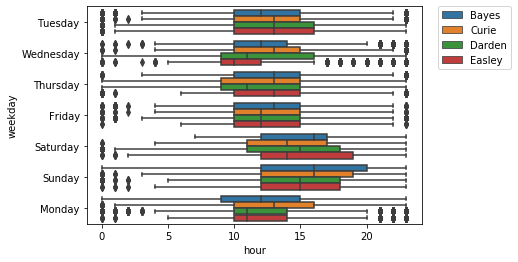

In [38]:
sns.boxplot(x=data_science.hour, y=data_science.weekday, hue=data_science.cohort, data=data_science)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)